In [8]:
#Import Library yang dibutuhkan untuk pemrosesan Klasifikasi
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score,f1_score, precision_score,recall_score,accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#Memanggil dataset dan menampilkan 5 data teratas
df = pd.read_csv("/content/CarPrice_Assignment.csv")
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [18]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [3]:
#Mengubah data per kolom yang dimana hanya memiliki 2 tipe nilai menjadi 0 atau 1
df['aspiration'] = df.aspiration.map({'std':1, 'turbo':0})
df['fueltype'] = df.fueltype.map({'gas':1, 'diesel':0})
df['doornumber'] = df['doornumber'].map({'two':1, 'four':0})
print(df)

     car_ID  symboling                   CarName  fueltype  aspiration  \
0         1          3        alfa-romero giulia         1           1   
1         2          3       alfa-romero stelvio         1           1   
2         3          1  alfa-romero Quadrifoglio         1           1   
3         4          2               audi 100 ls         1           1   
4         5          2                audi 100ls         1           1   
..      ...        ...                       ...       ...         ...   
200     201         -1           volvo 145e (sw)         1           1   
201     202         -1               volvo 144ea         1           0   
202     203         -1               volvo 244dl         1           1   
203     204         -1                 volvo 246         0           0   
204     205         -1               volvo 264gl         1           0   

     doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0             1  convertible        r

<ipython-input-4-cf5d9fef9e2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


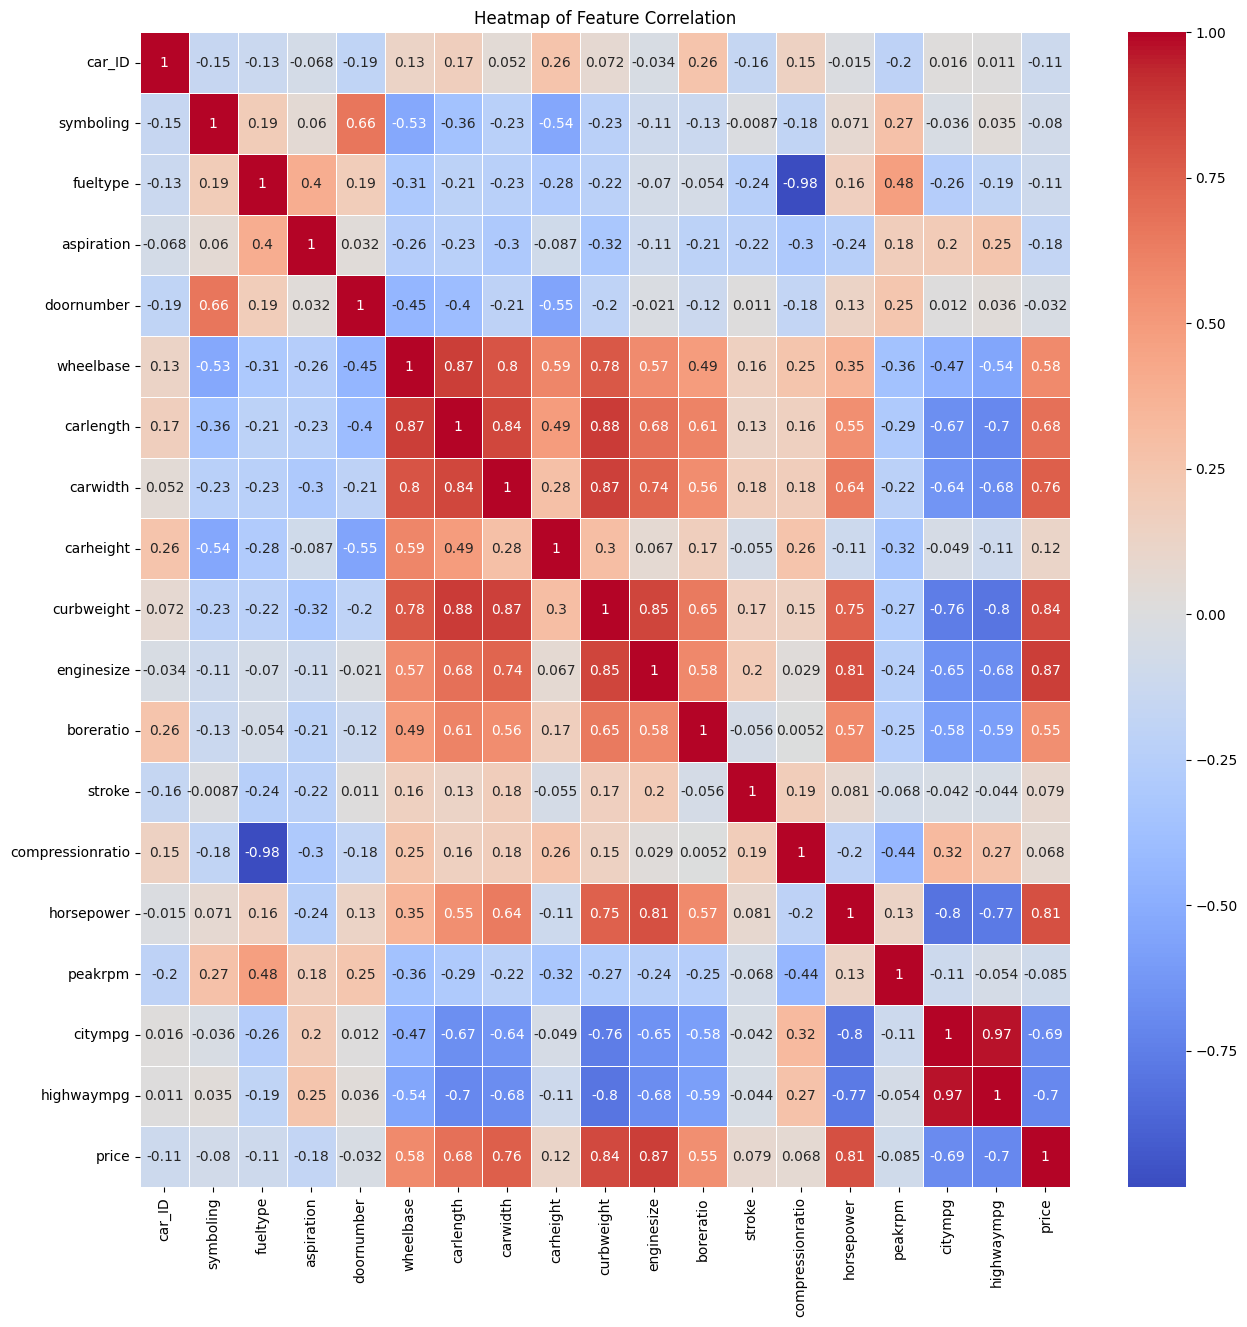

In [4]:
correlation_matrix = df.corr()

# Menentukan ukuran gambar heatmap
plt.figure(figsize=(15, 15))

# Membuat heatmap menggunakan Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Menambahkan judul
plt.title('Heatmap of Feature Correlation')

# Menampilkan heatmap
plt.show()

In [19]:
#Melakukan selection feature agar tidak semua kolom yang dijadikan fitur utuk mengolah data
columns = ['horsepower','boreratio','enginesize','curbweight','wheelbase','carlength','aspiration']

X = df[columns]
y = df['price'].astype(int)

#Melakukan Training dan Testing Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20,random_state=0)

In [14]:
X_train.shape

(164, 6)

In [15]:
y_train.shape

(164,)

In [20]:
#Melakukan Klasifikasi Metode NaiveBayes
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
predictions = model_gnb.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        5118       0.00      0.00      0.00       1.0
        5151       0.00      0.00      0.00       1.0
        5389       0.00      0.00      0.00       1.0
        5499       0.00      0.00      0.00       1.0
        5572       0.00      0.00      0.00       0.0
        6295       0.00      0.00      0.00       0.0
        6377       0.00      0.00      0.00       1.0
        6488       0.00      0.00      0.00       1.0
        6529       0.00      0.00      0.00       1.0
        6795       0.00      0.00      0.00       1.0
        6849       0.00      0.00      0.00       1.0
        6938       0.00      0.00      0.00       1.0
        7609       0.00      0.00      0.00       0.0
        7775       0.00      0.00      0.00       0.0
        7895       0.00      0.00      0.00       1.0
        7898       0.00      0.00      0.00       1.0
        7975       0.00      0.00      0.00       1.0
        8358       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.